<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


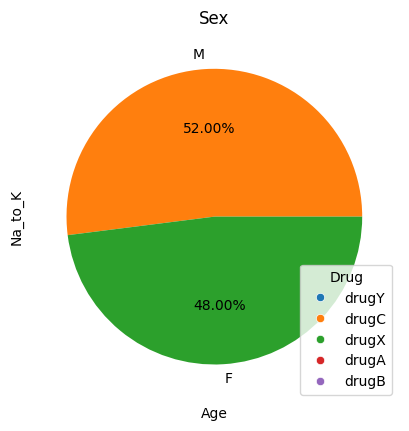

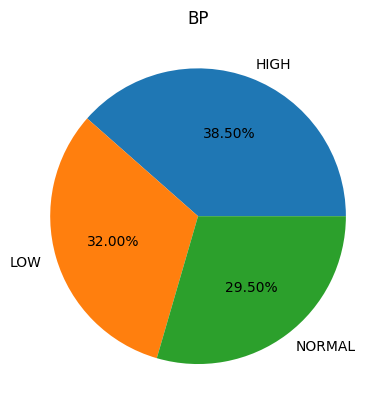

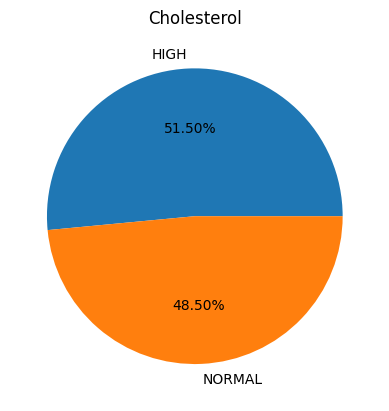

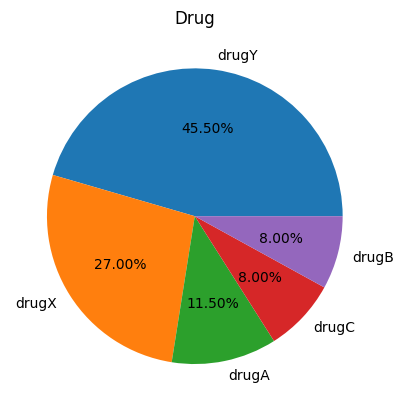

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



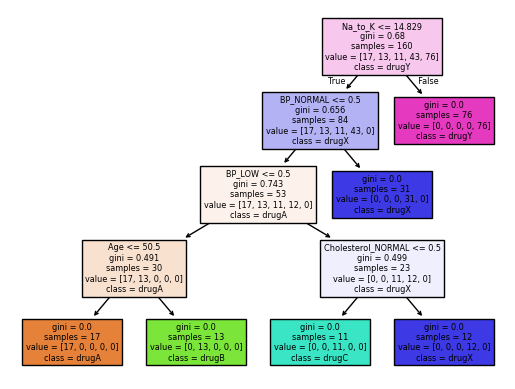

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         5
       drugX       0.43      0.91      0.59        11
       drugY       0.88      1.00      0.94        15

    accuracy                           0.62        40
   macro avg       0.26      0.38      0.31        40
weighted avg       0.45      0.62      0.51        40

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



(200, 7)

In [ ]:
#drug prediction using decision tree
import pandas as pd
import numpy as np
#Importing Data Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Importing Model Building Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/content/drug200.csv')
df.head()
#Check Info
df.info()
#Null value check
df.isnull().sum()
#Duplicate Values Check
df.duplicated().sum()

sns.scatterplot(data = df, x= 'Age', y = 'Na_to_K',hue='Drug')
categoricalColumns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categoricalColumns.append(column)

categoricalColumns

for column in categoricalColumns:
    newDf = df[column].value_counts().reset_index()
    plt.pie(newDf['count'],labels = newDf[column], autopct= '%0.2f%%')
    plt.title(column)
    plt.show()

#Convert categorical values to numeric
newDf1 = df[categoricalColumns].drop('Drug', axis =1)
ohe = OneHotEncoder(drop = 'first')
newDf2 = ohe.fit_transform(newDf1)
newDf2 = newDf2.toarray()
newDf2 = pd.DataFrame(newDf2,columns=ohe.get_feature_names_out())
newDf2
categoricalColumns

df = pd.concat([df.drop(['Sex', 'BP', 'Cholesterol'],axis=1),newDf2],axis=1)
df
X = df.drop('Drug', axis = 1)
y = df['Drug']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
plot_tree(model,filled=True,feature_names = X_train.columns,class_names = model.classes_)
plt.show()

model2 = SVC()
model2.fit(X_train,y_train)
y_pred1 = model2.predict(X_test)
accuracy_score(y_test,y_pred1)
print(classification_report(y_test,y_pred1))

model3 = RandomForestClassifier()
model3.fit(X_train,y_train)
y_pred2 = model3.predict(X_test)
accuracy_score(y_test, y_pred)
print(classification_report(y_test,y_pred))
# size of the dataset
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
Categorical Columns: ['Sex', 'BP', 'Cholesterol', 'Drug']


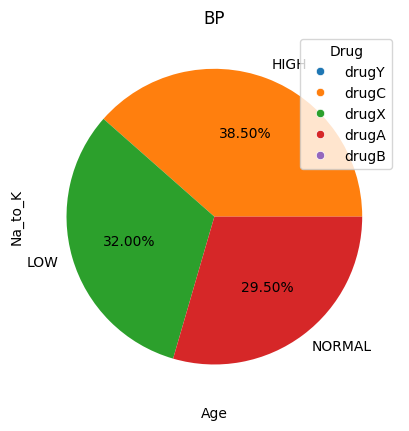

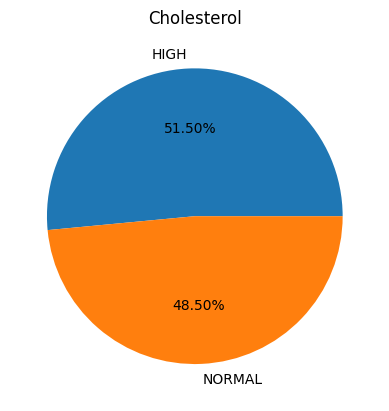

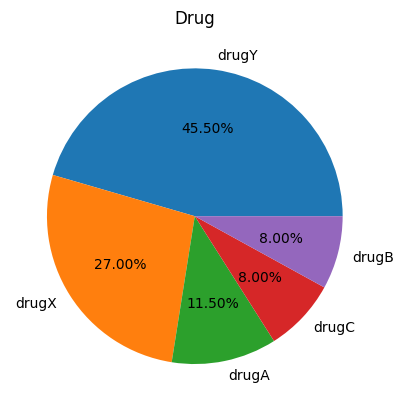

Decision Tree Accuracy: 1.0
Classification Report for Decision Tree:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



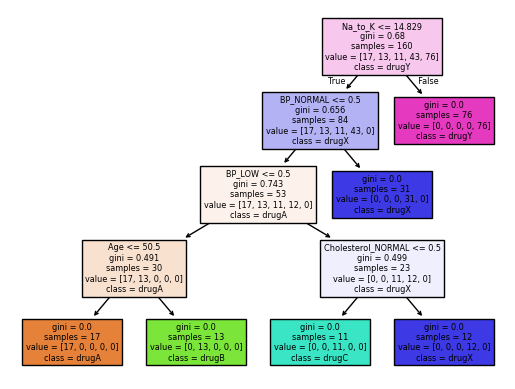

SVM Accuracy: 0.625
Classification Report for SVM:
               precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         5
       drugX       0.43      0.91      0.59        11
       drugY       0.88      1.00      0.94        15

    accuracy                           0.62        40
   macro avg       0.26      0.38      0.31        40
weighted avg       0.45      0.62      0.51        40

Random Forest Accuracy: 1.0
Classification Report for Random Forest:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro 

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/drug200.csv')

# Check the first few rows
df.head()

# Check data info
df.info()

# Check for null values
df.isnull().sum()

# Check for duplicate values
df.duplicated().sum()

# Scatter plot for Age vs Na_to_K, hue = Drug
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')

# Identify categorical columns
categoricalColumns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categoricalColumns.append(column)

print("Categorical Columns:", categoricalColumns)

# Remove the 'Sex' column
categoricalColumns.remove('Sex')

# Plot distributions for categorical columns (excluding 'Sex')
for column in categoricalColumns:
    newDf = df[column].value_counts().reset_index()
    newDf.columns = ['Category', 'Count']  # Rename columns for clarity
    plt.pie(newDf['Count'], labels=newDf['Category'], autopct='%0.2f%%')
    plt.title(column)
    plt.show()

# Convert categorical values to numeric, excluding 'Sex'
newDf1 = df[categoricalColumns].drop('Drug', axis=1)
ohe = OneHotEncoder(drop='first')
newDf2 = ohe.fit_transform(newDf1)
newDf2 = newDf2.toarray()
newDf2 = pd.DataFrame(newDf2, columns=ohe.get_feature_names_out())

# Drop 'Sex' from the dataset and concatenate numeric conversions
df = pd.concat([df.drop(['Sex', 'BP', 'Cholesterol'], axis=1), newDf2], axis=1)

# Splitting features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred))

plot_tree(model, filled=True, feature_names=X_train.columns, class_names=model.classes_)
plt.show()

# SVM Model
model2 = SVC()
model2.fit(X_train, y_train)
y_pred1 = model2.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report for SVM:\n", classification_report(y_test, y_pred1))

# Random Forest Model
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred2 = model3.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report for Random Forest:\n", classification_report(y_test, y_pred2))

# Gaussian Naive Bayes
model4 = GaussianNB()
model4.fit(X_train, y_train)
y_pred3 = model4.predict(X_test)
nb_accuracy = accuracy_score(y_test, y_pred3)
print("Gaussian Naive Bayes Accuracy:", nb_accuracy)
print("Classification Report for Gaussian Naive Bayes:\n", classification_report(y_test, y_pred3))

# Dataset shape
print("Dataset Shape:", df.shape)


Null values: 0
Duplicate values: 0


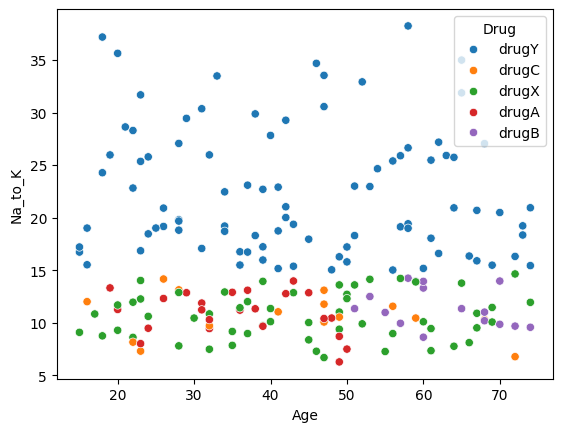

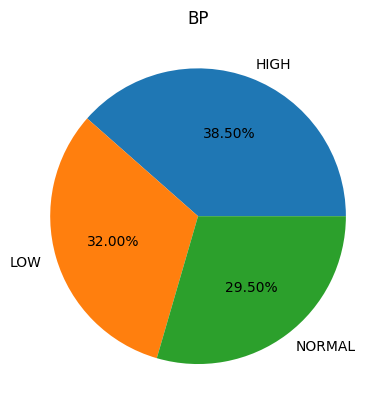

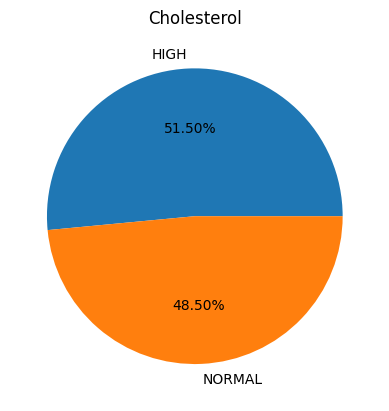

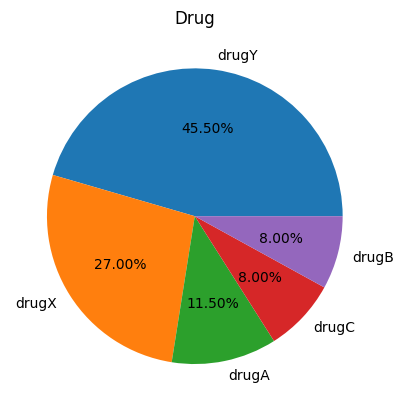

Multinomial Naive Bayes Accuracy: 0.5
Classification Report for Multinomial Naive Bayes:
               precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         5
       drugX       1.00      0.45      0.62        11
       drugY       0.43      1.00      0.60        15

    accuracy                           0.50        40
   macro avg       0.29      0.29      0.25        40
weighted avg       0.44      0.50      0.40        40



In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/drug200.csv')

# Check for null and duplicate values
print("Null values:", df.isnull().sum().sum())
print("Duplicate values:", df.duplicated().sum())

# Drop the 'Sex' column (Gender feature)
df = df.drop('Sex', axis=1)

# Visualize scatter plot
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')
plt.show()

# Identify categorical columns
categoricalColumns = [col for col in df.columns if df[col].dtype == 'object']

# Plot pie charts for categorical columns
for column in categoricalColumns:
    newDf = df[column].value_counts().reset_index()
    newDf.columns = ['Category', 'Count']  # Rename for clarity
    plt.pie(newDf['Count'], labels=newDf['Category'], autopct='%0.2f%%')
    plt.title(column)
    plt.show()

# Convert categorical variables to numeric
newDf1 = df[categoricalColumns].drop('Drug', axis=1)
ohe = OneHotEncoder(drop='first')
newDf2 = ohe.fit_transform(newDf1).toarray()
newDf2 = pd.DataFrame(newDf2, columns=ohe.get_feature_names_out())

# Concatenate numerical and encoded categorical data
df = pd.concat([df.drop(['BP', 'Cholesterol'], axis=1), newDf2], axis=1)

# Split data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (Multinomial Naive Bayes requires non-negative data)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Multinomial Naive Bayes
model5 = MultinomialNB()
model5.fit(X_train_scaled, y_train)
y_pred4 = model5.predict(X_test_scaled)

# Evaluate the model
mnb_accuracy = accuracy_score(y_test, y_pred4)
print("Multinomial Naive Bayes Accuracy:", mnb_accuracy)
print("Classification Report for Multinomial Naive Bayes:\n", classification_report(y_test, y_pred4))


Null values: 0
Duplicate values: 0


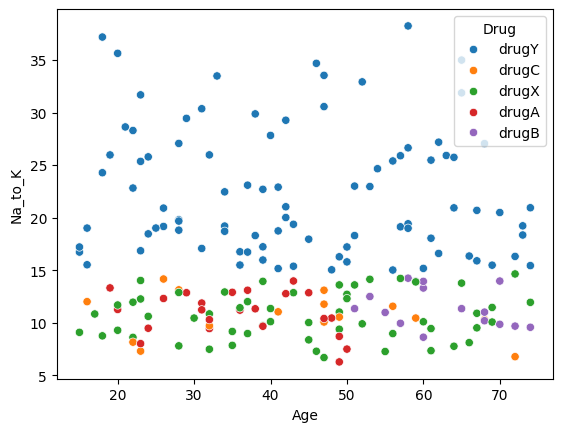

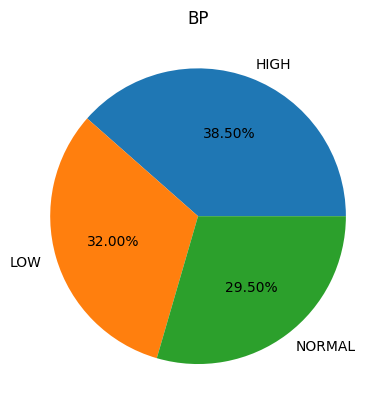

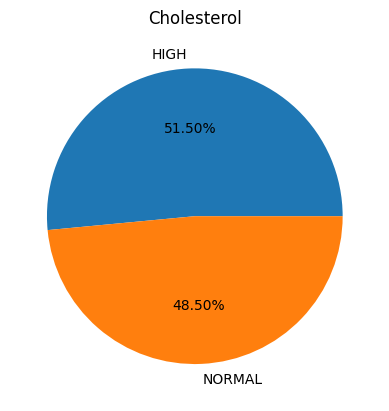

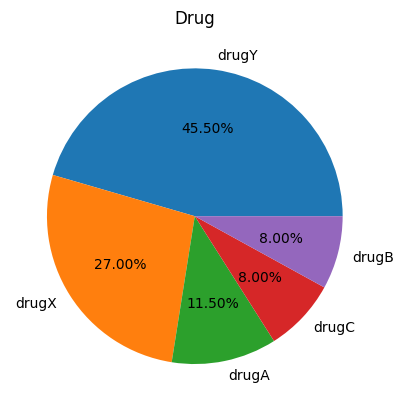

Bernoulli Naive Bayes Accuracy: 0.425
Classification Report for Bernoulli Naive Bayes:
               precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         3
       drugC       0.00      0.00      0.00         5
       drugX       0.62      0.45      0.53        11
       drugY       0.38      0.80      0.51        15

    accuracy                           0.42        40
   macro avg       0.20      0.25      0.21        40
weighted avg       0.31      0.42      0.34        40



In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, Binarizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
import warnings

# Supress Warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('/content/drug200.csv')

# Check for null and duplicate values
print("Null values:", df.isnull().sum().sum())
print("Duplicate values:", df.duplicated().sum())

# Drop the 'Sex' column (Gender feature)
df = df.drop('Sex', axis=1)

# Visualize scatter plot
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')
plt.show()

# Identify categorical columns
categoricalColumns = [col for col in df.columns if df[col].dtype == 'object']

# Plot pie charts for categorical columns
for column in categoricalColumns:
    newDf = df[column].value_counts().reset_index()
    newDf.columns = ['Category', 'Count']  # Rename for clarity
    plt.pie(newDf['Count'], labels=newDf['Category'], autopct='%0.2f%%')
    plt.title(column)
    plt.show()

# Convert categorical variables to numeric
newDf1 = df[categoricalColumns].drop('Drug', axis=1)
ohe = OneHotEncoder(drop='first')
newDf2 = ohe.fit_transform(newDf1).toarray()
newDf2 = pd.DataFrame(newDf2, columns=ohe.get_feature_names_out())

# Concatenate numerical and encoded categorical data
df = pd.concat([df.drop(['BP', 'Cholesterol'], axis=1), newDf2], axis=1)

# Split data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Binarizing the features (converting numerical data to binary form)
binarizer = Binarizer(threshold=0.5)  # Adjust threshold if necessary
X_binarized = binarizer.fit_transform(X)

# Splitting the dataset into train and test sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binarized, y, test_size=0.2, random_state=42)

# Applying Bernoulli Naive Bayes
model5 = BernoulliNB()
model5.fit(X_train_bin, y_train_bin)
y_pred4 = model5.predict(X_test_bin)

# Evaluate the model
bnb_accuracy = accuracy_score(y_test_bin, y_pred4)
print("Bernoulli Naive Bayes Accuracy:", bnb_accuracy)
print("Classification Report for Bernoulli Naive Bayes:\n", classification_report(y_test_bin, y_pred4))


Null values: 0
Duplicate values: 0


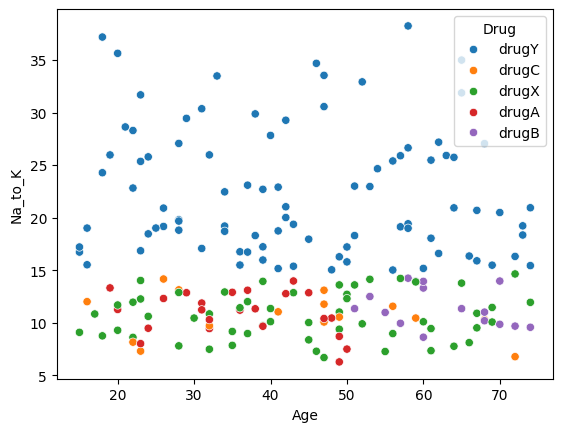

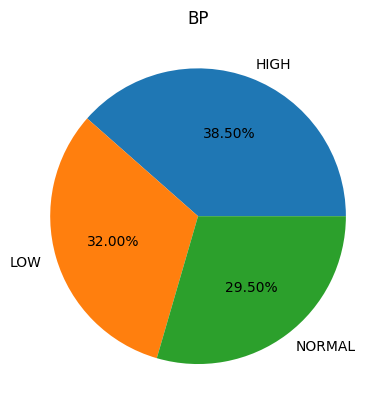

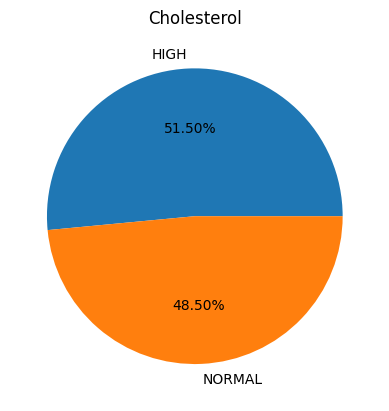

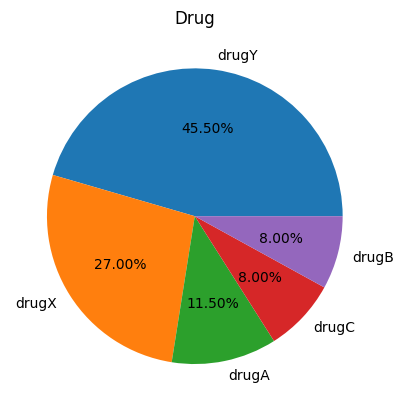

Decision Tree Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



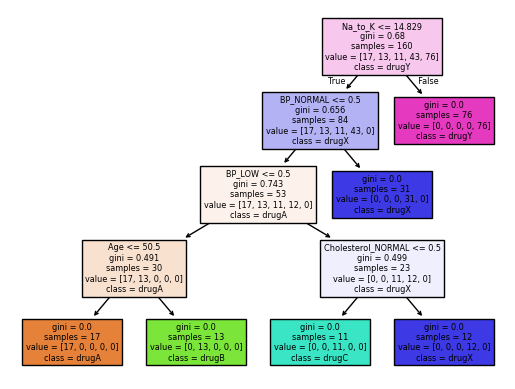

Decision Tree Feature Importance:
              Feature  Importance
1             Na_to_K    0.493261
3           BP_NORMAL    0.144739
0                 Age    0.135510
2              BP_LOW    0.120919
4  Cholesterol_NORMAL    0.105571


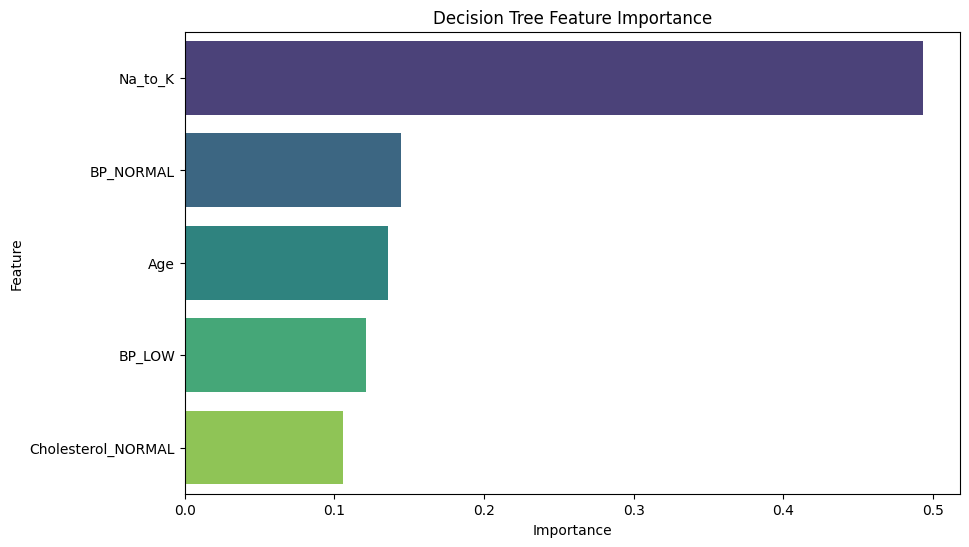

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings

# Suppress Warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drug200.csv')

# Check for null and duplicate values
print("Null values:", df.isnull().sum().sum())
print("Duplicate values:", df.duplicated().sum())

# Drop the 'Sex' column (Gender feature)
df = df.drop('Sex', axis=1)

# Scatterplot
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')
plt.show()

# Identify categorical columns
categoricalColumns = [col for col in df.columns if df[col].dtype == 'object']

# Plot pie charts for categorical columns
for column in categoricalColumns:
    newDf = df[column].value_counts().reset_index()
    newDf.columns = ['Category', 'Count']  # Rename for clarity
    plt.pie(newDf['Count'], labels=newDf['Category'], autopct='%0.2f%%')
    plt.title(column)
    plt.show()

# Convert categorical variables to numeric
newDf1 = df[categoricalColumns].drop('Drug', axis=1)
ohe = OneHotEncoder(drop='first')
newDf2 = ohe.fit_transform(newDf1).toarray()
newDf2 = pd.DataFrame(newDf2, columns=ohe.get_feature_names_out())

# Concatenate numerical and encoded categorical data
df = pd.concat([df.drop(['BP', 'Cholesterol'], axis=1), newDf2], axis=1)

# Split data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot the Decision Tree
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=model.classes_)
plt.show()

# Feature Importance - Decision Tree
feature_importance_dt = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_dt
}).sort_values(by='Importance', ascending=False)

print("Decision Tree Feature Importance:")
print(feature_importance_df_dt)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_dt, palette='viridis')
plt.title('Decision Tree Feature Importance')
plt.show()


Null values: 0
Duplicate values: 0


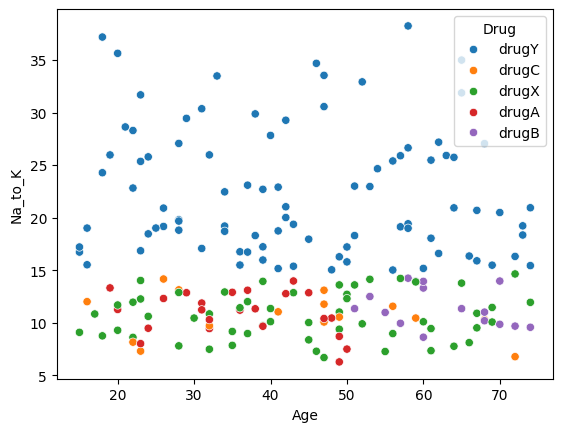

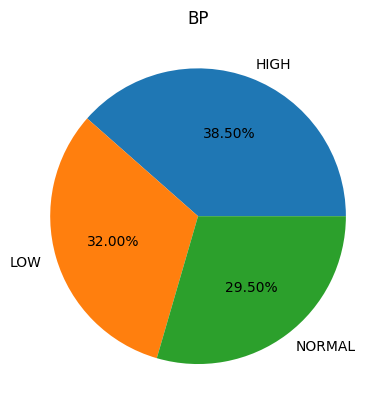

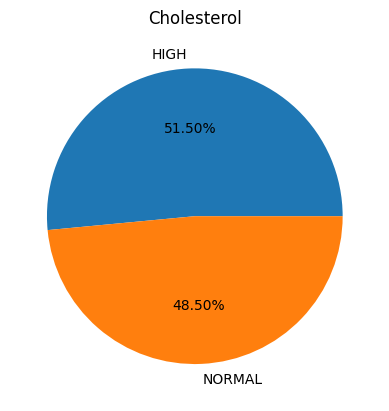

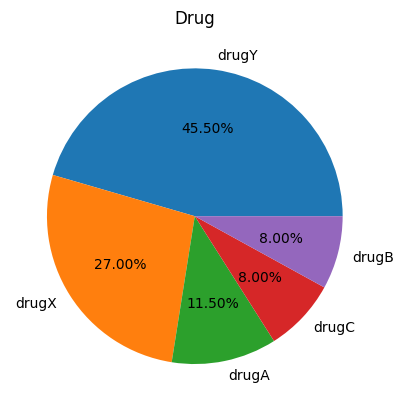

Random Forest Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Random Forest Feature Importance:
              Feature  Importance
1             Na_to_K    0.553132
3           BP_NORMAL    0.146204
0                 Age    0.141980
2              BP_LOW    0.097813
4  Cholesterol_NORMAL    0.060871


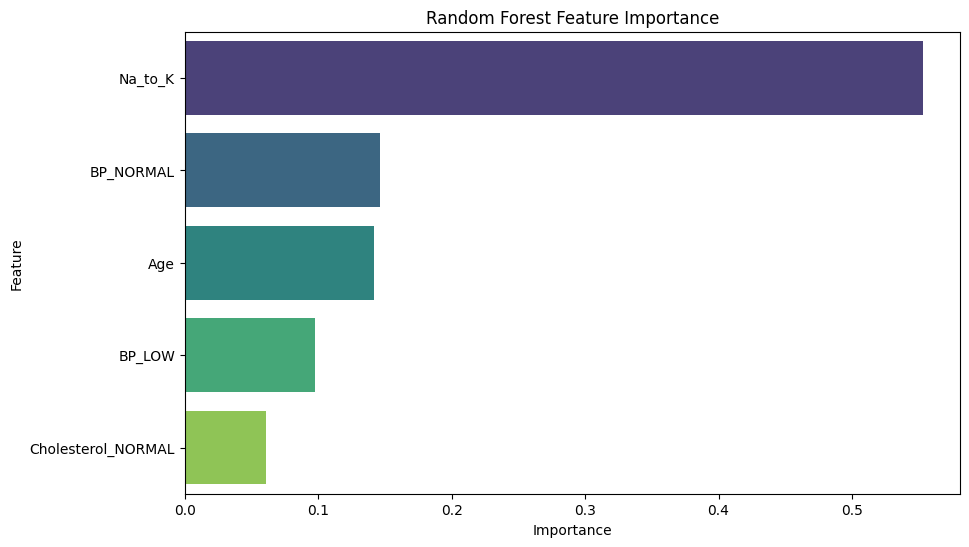

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Suppress Warnings
warnings.filterwarnings('ignore')

# Load the dataset
df = pd.read_csv('/content/drug200.csv')

# Check for null and duplicate values
print("Null values:", df.isnull().sum().sum())
print("Duplicate values:", df.duplicated().sum())

# Drop the 'Sex' column (Gender feature)
df = df.drop('Sex', axis=1)

# Scatterplot
sns.scatterplot(data=df, x='Age', y='Na_to_K', hue='Drug')
plt.show()

# Identify categorical columns
categoricalColumns = [col for col in df.columns if df[col].dtype == 'object']

# Plot pie charts for categorical columns
for column in categoricalColumns:
    newDf = df[column].value_counts().reset_index()
    newDf.columns = ['Category', 'Count']  # Rename for clarity
    plt.pie(newDf['Count'], labels=newDf['Category'], autopct='%0.2f%%')
    plt.title(column)
    plt.show()

# Convert categorical variables to numeric
newDf1 = df[categoricalColumns].drop('Drug', axis=1)
ohe = OneHotEncoder(drop='first')
newDf2 = ohe.fit_transform(newDf1).toarray()
newDf2 = pd.DataFrame(newDf2, columns=ohe.get_feature_names_out())

# Concatenate numerical and encoded categorical data
df = pd.concat([df.drop(['BP', 'Cholesterol'], axis=1), newDf2], axis=1)

# Split data into features and target
X = df.drop('Drug', axis=1)
y = df['Drug']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred2 = model3.predict(X_test)

# Evaluate the Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

# Feature Importance - Random Forest
feature_importance_rf = model3.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importance:")
print(feature_importance_df_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()
